# NYC COVID-19 cases over time

**Data source:** New York City Health Department's [COVID-19 Daily Data Summary](https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-daily-data-summary.pdf)

## 0. Import Dependencies

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

## 1. Read Data

In [2]:
update_str = 'as reported by NYC Health on March 21, 2020, 5:30pm'
source_str = 'Sources: nyc.gov/coronavirus & carlos-afonso.github.io/COVID-19'

data_file = '../data/nyc-health-daily-data-summary/nyc-covid-19-cases-over-time.csv'

df = pd.read_csv(data_file)
df

,date,total_cases,new_cases
0,2020-03-01,1,1
1,2020-03-02,1,0
2,2020-03-03,2,1
3,2020-03-04,2,0
4,2020-03-05,4,2
5,2020-03-06,7,3
6,2020-03-07,12,5
7,2020-03-08,14,2
8,2020-03-09,25,11
9,2020-03-10,32,7


In [3]:
# Define a function to create the date labels to show in the plot
def date_labels(dates):
    first_label = dates[0].strftime("%#d\n%b\n%Y")
    last_label = dates[len(dates)-1].strftime("%#d\n%b\n%Y")
    labels = [first_label]
    for i in range(1, len(dates) - 1):
        label = dates[i].strftime("%#d")
        if dates[i].month != dates[i-1].month:
            label = label + dates[i].strftime("\n%b")
        labels.append(label)
    labels.append(last_label)
    return labels

df['date_obj'] = df['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

df['date_label'] = date_labels(df['date_obj'])

df

,date,total_cases,new_cases,date_obj,date_label
0,2020-03-01,1,1,2020-03-01,1\nMar\n2020
1,2020-03-02,1,0,2020-03-02,2
2,2020-03-03,2,1,2020-03-03,3
3,2020-03-04,2,0,2020-03-04,4
4,2020-03-05,4,2,2020-03-05,5
5,2020-03-06,7,3,2020-03-06,6
6,2020-03-07,12,5,2020-03-07,7
7,2020-03-08,14,2,2020-03-08,8
8,2020-03-09,25,11,2020-03-09,9
9,2020-03-10,32,7,2020-03-10,10


## 2. Total cases over time

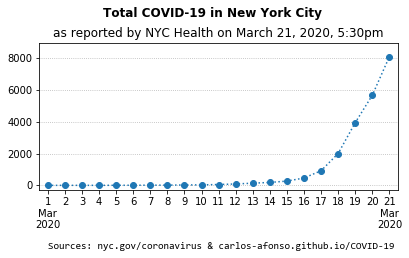

In [4]:
fig = plt.figure()

plt.plot(df['date_label'], df['total_cases'], 'o:')

plt.xlim(-0.5, len(df)-0.5)
plt.ylim(-300, 9000)

plt.grid(axis='y', linestyle=':')

plt.suptitle('Total COVID-19 in New York City', x=0.5, fontweight='bold')
plt.title(update_str)

plt.text(0, -4000, source_str, fontfamily='Consolas')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [5]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-total-cases-over-time'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

## 3. New cases over time

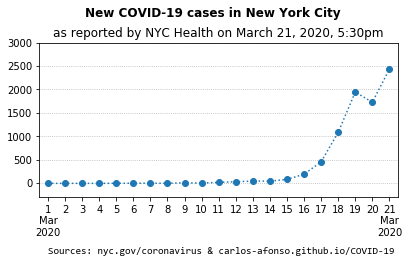

In [6]:
fig = plt.figure()

plt.plot(df['date_label'], df['new_cases'], 'o:')

plt.xlim(-0.5, len(df)-0.5)
plt.ylim(-300, 3000)

plt.grid(axis='y', linestyle=':')

plt.suptitle('New COVID-19 cases in New York City', x=0.5, fontweight='bold')
plt.title(update_str)

plt.text(0, -1500, source_str, fontfamily='Consolas')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [7]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-new-cases-over-time'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)